# Generation of the simulation 

### News :
- "adaptative" dt
- begin to the (2nd) stable equilibrium
- different variability
- different collapse (collapse proba and collapse proba per time unit)
- different application to the variability

In [1]:
import time as tm
import colorsys
import pickle # package use to save data

exec(open("solver2.py").read(), globals())
exec(open("param.py").read(), globals())

In [2]:
def exemples(name, Number_of_simulation = 100, mean = True, **kwargs):
    name = name+"_freq="+str(kwargs["Fire_param"]["param_freq"]["p"])+".png"
    O = Ode(**kwargs)
    Y = O.solve_by_part()
    O.plot_time_series(save = True, name = name, generation = True, show = False)
    return Y

In [3]:
def param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name):
   # Color = ["blue", "g", "red", "orange", "pink", "black", "magenta", "grey"]
    Param_coupled = {"alpha":alpha,
                     "beta":beta}
    Param_freq = {"p":-1} # going to change
    Param_strength = {"scale":strength}
    Fire_param = {"model": "coupled",
                    "frequence": "bernoulli",
                    "param_freq" : Param_freq,
                    "amplitude": "exponential",
                    "Param_strength" : Param_strength,
                    "Param_coupled" : Param_coupled,
                    "type" : "proportionnal",
                    "coef_W_N" : 5}


    # Initialization of arrays
    Collapse_proba = np.zeros((numbreDePoint, len(Freq)))
    Collapse_proba_per_time_unit = np.zeros_like(Collapse_proba)

    Variability_always_N = np.zeros_like(Collapse_proba)
    Variability_until_N = np.zeros_like(Collapse_proba)
    Variability_10_N = np.zeros_like(Collapse_proba)
    Variability_only_N = np.zeros_like(Collapse_proba)
    Variability_tr10_N = np.zeros_like(Collapse_proba)
    Variability_tr0_N = np.zeros_like(Collapse_proba)
    
    Variability_always_W = np.zeros_like(Collapse_proba)
    Variability_until_W = np.zeros_like(Collapse_proba)
    Variability_10_W = np.zeros_like(Collapse_proba)
    Variability_only_W = np.zeros_like(Collapse_proba)
    Variability_tr10_W = np.zeros_like(Collapse_proba)
    Variability_tr0_W = np.zeros_like(Collapse_proba)
    
    Variability_always_NW = np.zeros_like(Collapse_proba)
    Variability_until_NW = np.zeros_like(Collapse_proba)
    Variability_10_NW = np.zeros_like(Collapse_proba)
    Variability_only_NW = np.zeros_like(Collapse_proba)
    Variability_tr10_NW = np.zeros_like(Collapse_proba)
    Variability_tr0_NW = np.zeros_like(Collapse_proba)
    
    #Exemples = np.zeros(len(Freq))
    
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire_param["param_freq"] = Param_freq
        dt = min(0.1, 0.1/freq)
        #Init = [1, Param_phy[1]]
        exemples(name = name, Number_of_simulation = Number_of_simulation, mean = False, finalTime = finalTime, Fire_param = Fire_param, dt = dt, Param_phy=Param_phy, Init=Init)
        for j in range(numbreDePoint):
            S = Solver(numberOfSimulation=Number_of_simulation, model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            S.run()
            Collapse_proba[j,i] = S.collapse_proba()
            Collapse_proba_per_time_unit[j,i] = S.collapse_proba_per_time_unit()

            Variability_always_N[j,i] = S.variability_always(applicant="N")
            Variability_until_N[j,i] = S.variability_until(applicant="N")
            Variability_10_N[j,i] = S.variability_10(applicant="N")
            Variability_only_N[j,i] = S.variability_only(applicant="N")
            Variability_tr10_N[j,i] = S.variability_tr10(applicant="N")
            Variability_tr0_N[j,i] = S.variability_tr0(applicant="N")
            
            Variability_always_W[j,i] = S.variability_always(applicant="W")
            Variability_until_W[j,i] = S.variability_until(applicant="W")
            Variability_10_W[j,i] = S.variability_10(applicant="W")
            Variability_only_W[j,i] = S.variability_only(applicant="W")
            Variability_tr10_W[j,i] = S.variability_tr10(applicant="W")
            Variability_tr0_W[j,i] = S.variability_tr0(applicant="W")
            
            Variability_always_NW[j,i] = S.variability_always(applicant="N+W")
            Variability_until_NW[j,i] = S.variability_until(applicant="N+W")
            Variability_10_NW[j,i] = S.variability_10(applicant="N+W")
            Variability_only_NW[j,i] = S.variability_only(applicant="N+W")
            Variability_tr10_NW[j,i] = S.variability_tr10(applicant="N+W")
            Variability_tr0_NW[j,i] = S.variability_tr0(applicant="N+W")
            
           # print("\nTime solve init", t05-t0)
            #print("Time solver ", t1-t05)
            #print("Time collapse ", t2-t1)
            #print("Time variability ", t3-t2)
       
    Measures = {"Collapse_proba": Collapse_proba,
                "Collapse_proba_per_time_unit": Collapse_proba_per_time_unit, 
                
                "Variability_always_N": Variability_always_N, 
                "Variability_until_N":Variability_until_N,
                "Variability_10_N":Variability_10_N,
                "Variability_only_N":Variability_only_N,
                "Variability_tr10_N": Variability_tr10_N,
                "Variability_tr0_N": Variability_tr0_N,
                
                "Variability_always_W": Variability_always_W, 
                "Variability_until_W":Variability_until_W,
                "Variability_10_W":Variability_10_W,
                "Variability_only_W":Variability_only_W,
                "Variability_tr10_W": Variability_tr10_W,
                "Variability_tr0_W": Variability_tr0_W,
                
                "Variability_always_NW": Variability_always_NW, 
                "Variability_until_NW":Variability_until_NW,
                "Variability_10_NW":Variability_10_NW,
                "Variability_only_NW":Variability_only_NW,
                "Variability_tr10_NW": Variability_tr10_NW,
                "Variability_tr0_NW": Variability_tr0_NW              
               }
    
    # save data
    pickle_out = open(name+".txt","wb")
    pickle.dump(Measures, pickle_out)
    pickle_out.close()
    
    return

Time at the lunch of the simulation : 
 Tue Apr 23 12:44:47 2019 , Figure  0 (total  13230 )
Tue Apr 23 12:49:07 2019 , Figure  15 (total  13230 )
Tue Apr 23 12:53:26 2019 , Figure  30 (total  13230 )
Tue Apr 23 12:57:46 2019 , Figure  45 (total  13230 )
Tue Apr 23 13:02:04 2019 , Figure  60 (total  13230 )
Tue Apr 23 13:06:21 2019 , Figure  75 (total  13230 )
Tue Apr 23 13:10:38 2019 , Figure  90 (total  13230 )
Tue Apr 23 13:14:56 2019 , Figure  105 (total  13230 )
Tue Apr 23 13:19:14 2019 , Figure  120 (total  13230 )
Tue Apr 23 13:23:32 2019 , Figure  135 (total  13230 )
Tue Apr 23 13:27:49 2019 , Figure  150 (total  13230 )
Tue Apr 23 13:32:07 2019 , Figure  165 (total  13230 )
Tue Apr 23 13:36:24 2019 , Figure  180 (total  13230 )
Tue Apr 23 13:40:42 2019 , Figure  195 (total  13230 )
Tue Apr 23 13:45:00 2019 , Figure  210 (total  13230 )
Tue Apr 23 13:49:18 2019 , Figure  225 (total  13230 )
Tue Apr 23 13:53:37 2019 , Figure  240 (total  13230 )
Tue Apr 23 13:57:58 2019 , Figure

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:184: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: RuntimeWarning: Mean of empty slice


Tue Apr 23 19:48:02 2019 , Figure  1455 (total  13230 )
Tue Apr 23 19:52:27 2019 , Figure  1470 (total  13230 )
Tue Apr 23 19:56:51 2019 , Figure  1485 (total  13230 )
Tue Apr 23 20:01:15 2019 , Figure  1500 (total  13230 )
Tue Apr 23 20:05:39 2019 , Figure  1515 (total  13230 )
Tue Apr 23 20:10:03 2019 , Figure  1530 (total  13230 )


C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:185: RuntimeWarning: Mean of empty slice


Tue Apr 23 20:14:28 2019 , Figure  1545 (total  13230 )
Tue Apr 23 20:18:51 2019 , Figure  1560 (total  13230 )
Tue Apr 23 20:23:16 2019 , Figure  1575 (total  13230 )
Tue Apr 23 20:27:40 2019 , Figure  1590 (total  13230 )
Tue Apr 23 20:32:05 2019 , Figure  1605 (total  13230 )
Tue Apr 23 20:36:30 2019 , Figure  1620 (total  13230 )
Tue Apr 23 20:40:55 2019 , Figure  1635 (total  13230 )
Tue Apr 23 20:45:18 2019 , Figure  1650 (total  13230 )
Tue Apr 23 20:49:44 2019 , Figure  1665 (total  13230 )
Tue Apr 23 20:54:08 2019 , Figure  1680 (total  13230 )
Tue Apr 23 20:58:32 2019 , Figure  1695 (total  13230 )
Tue Apr 23 21:02:56 2019 , Figure  1710 (total  13230 )
Tue Apr 23 21:07:20 2019 , Figure  1725 (total  13230 )
Tue Apr 23 21:11:44 2019 , Figure  1740 (total  13230 )
Tue Apr 23 21:16:09 2019 , Figure  1755 (total  13230 )
Tue Apr 23 21:20:34 2019 , Figure  1770 (total  13230 )
Tue Apr 23 21:24:59 2019 , Figure  1785 (total  13230 )
Tue Apr 23 21:29:24 2019 , Figure  1800 (total  

Wed Apr 24 07:03:51 2019 , Figure  3750 (total  13230 )
Wed Apr 24 07:08:17 2019 , Figure  3765 (total  13230 )
Wed Apr 24 07:12:43 2019 , Figure  3780 (total  13230 )
Wed Apr 24 07:17:08 2019 , Figure  3795 (total  13230 )
Wed Apr 24 07:21:35 2019 , Figure  3810 (total  13230 )
Wed Apr 24 07:26:00 2019 , Figure  3825 (total  13230 )
Wed Apr 24 07:30:25 2019 , Figure  3840 (total  13230 )
Wed Apr 24 07:34:51 2019 , Figure  3855 (total  13230 )
Wed Apr 24 07:39:16 2019 , Figure  3870 (total  13230 )
Wed Apr 24 07:43:40 2019 , Figure  3885 (total  13230 )
Wed Apr 24 07:48:05 2019 , Figure  3900 (total  13230 )
Wed Apr 24 07:52:29 2019 , Figure  3915 (total  13230 )
Wed Apr 24 07:56:54 2019 , Figure  3930 (total  13230 )
Wed Apr 24 08:01:19 2019 , Figure  3945 (total  13230 )
Wed Apr 24 08:05:44 2019 , Figure  3960 (total  13230 )
Wed Apr 24 08:10:09 2019 , Figure  3975 (total  13230 )
Wed Apr 24 08:14:33 2019 , Figure  3990 (total  13230 )
Wed Apr 24 08:18:58 2019 , Figure  4005 (total  

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:484: RuntimeWarning: invalid value encountered in less
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Wed Apr 24 15:59:52 2019 , Figure  5595 (total  13230 )
Wed Apr 24 16:04:14 2019 , Figure  5610 (total  13230 )
Wed Apr 24 16:08:38 2019 , Figure  5625 (total  13230 )
Wed Apr 24 16:13:04 2019 , Figure  5640 (total  13230 )
Wed Apr 24 16:17:26 2019 , Figure  5655 (total  13230 )
Wed Apr 24 16:21:47 2019 , Figure  5670 (total  13230 )
Wed Apr 24 16:26:05 2019 , Figure  5685 (total  13230 )
Wed Apr 24 16:30:24 2019 , Figure  5700 (total  13230 )
Wed Apr 24 16:34:44 2019 , Figure  5715 (total  13230 )
Wed Apr 24 16:39:04 2019 , Figure  5730 (total  13230 )
Wed Apr 24 16:43:24 2019 , Figure  5745 (total  13230 )
Wed Apr 24 16:47:43 2019 , Figure  5760 (total  13230 )
Wed Apr 24 16:52:04 2019 , Figure  5775 (total  13230 )
Wed Apr 24 16:56:25 2019 , Figure  5790 (total  13230 )
Wed Apr 24 17:00:45 2019 , Figure  5805 (total  13230 )
Wed Apr 24 17:05:04 2019 , Figure  5820 (total  13230 )
Wed Apr 24 17:09:24 2019 , Figure  5835 (total  13230 )
Wed Apr 24 17:13:44 2019 , Figure  5850 (total  

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: Mean of empty slice


Thu Apr 25 01:07:48 2019 , Figure  7485 (total  13230 )
Thu Apr 25 01:12:07 2019 , Figure  7500 (total  13230 )
Thu Apr 25 01:16:26 2019 , Figure  7515 (total  13230 )
Thu Apr 25 01:20:46 2019 , Figure  7530 (total  13230 )
Thu Apr 25 01:25:08 2019 , Figure  7545 (total  13230 )
Thu Apr 25 01:29:29 2019 , Figure  7560 (total  13230 )
Thu Apr 25 01:33:51 2019 , Figure  7575 (total  13230 )
Thu Apr 25 01:38:13 2019 , Figure  7590 (total  13230 )
Thu Apr 25 01:42:35 2019 , Figure  7605 (total  13230 )
Thu Apr 25 01:46:58 2019 , Figure  7620 (total  13230 )
Thu Apr 25 01:51:20 2019 , Figure  7635 (total  13230 )
Thu Apr 25 01:55:41 2019 , Figure  7650 (total  13230 )
Thu Apr 25 02:00:03 2019 , Figure  7665 (total  13230 )
Thu Apr 25 02:04:24 2019 , Figure  7680 (total  13230 )
Thu Apr 25 02:08:47 2019 , Figure  7695 (total  13230 )
Thu Apr 25 02:13:09 2019 , Figure  7710 (total  13230 )
Thu Apr 25 02:17:30 2019 , Figure  7725 (total  13230 )
Thu Apr 25 02:21:53 2019 , Figure  7740 (total  

Thu Apr 25 11:47:14 2019 , Figure  9690 (total  13230 )
Thu Apr 25 11:51:33 2019 , Figure  9705 (total  13230 )
Thu Apr 25 11:55:51 2019 , Figure  9720 (total  13230 )
Thu Apr 25 12:00:15 2019 , Figure  9735 (total  13230 )
Thu Apr 25 12:04:38 2019 , Figure  9750 (total  13230 )
Thu Apr 25 12:09:02 2019 , Figure  9765 (total  13230 )
Thu Apr 25 12:13:26 2019 , Figure  9780 (total  13230 )
Thu Apr 25 12:17:49 2019 , Figure  9795 (total  13230 )
Thu Apr 25 12:22:13 2019 , Figure  9810 (total  13230 )
Thu Apr 25 12:26:33 2019 , Figure  9825 (total  13230 )
Thu Apr 25 12:30:53 2019 , Figure  9840 (total  13230 )
Thu Apr 25 12:35:15 2019 , Figure  9855 (total  13230 )
Thu Apr 25 12:39:36 2019 , Figure  9870 (total  13230 )
Thu Apr 25 12:44:01 2019 , Figure  9885 (total  13230 )
Thu Apr 25 12:48:24 2019 , Figure  9900 (total  13230 )
Thu Apr 25 12:52:44 2019 , Figure  9915 (total  13230 )
Thu Apr 25 12:57:04 2019 , Figure  9930 (total  13230 )
Thu Apr 25 13:01:24 2019 , Figure  9945 (total  

Thu Apr 25 22:15:18 2019 , Figure  11865 (total  13230 )
Thu Apr 25 22:19:40 2019 , Figure  11880 (total  13230 )
Thu Apr 25 22:24:00 2019 , Figure  11895 (total  13230 )
Thu Apr 25 22:28:22 2019 , Figure  11910 (total  13230 )
Thu Apr 25 22:32:44 2019 , Figure  11925 (total  13230 )
Thu Apr 25 22:37:07 2019 , Figure  11940 (total  13230 )
Thu Apr 25 22:41:29 2019 , Figure  11955 (total  13230 )
Thu Apr 25 22:45:50 2019 , Figure  11970 (total  13230 )
Thu Apr 25 22:50:11 2019 , Figure  11985 (total  13230 )
Thu Apr 25 22:54:33 2019 , Figure  12000 (total  13230 )
Thu Apr 25 22:58:53 2019 , Figure  12015 (total  13230 )
Thu Apr 25 23:03:12 2019 , Figure  12030 (total  13230 )
Thu Apr 25 23:07:32 2019 , Figure  12045 (total  13230 )
Thu Apr 25 23:11:53 2019 , Figure  12060 (total  13230 )
Thu Apr 25 23:16:12 2019 , Figure  12075 (total  13230 )
Thu Apr 25 23:20:32 2019 , Figure  12090 (total  13230 )
Thu Apr 25 23:24:51 2019 , Figure  12105 (total  13230 )
Thu Apr 25 23:29:11 2019 , Figu

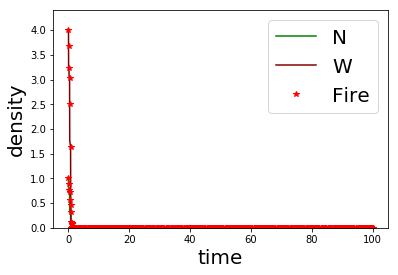

In [4]:
nomberFigure = len(N0)*len(W0)*len(FinalTime)*len(A)*len(M)*len(Alpha)*len(Beta)*len(Strength)
fig_by_loop = len(Freq) + 1

c=0
print("Time at the lunch of the simulation : \n", tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure


for n0 in N0:
    for w0 in W0:
        Init = [n0, w0]
        for finalTime in FinalTime:
            for a in A:
                for m in M:
                    Param_phy = [a, m]
                    Init = [1., Param_phy[1]]
                    for strength in Strength:
                        for alpha in Alpha:
                            for beta in Beta:
                                name = DOSSIER+"n0="+str(Init[0])+"_w0="+str(Init[1])+"_final_time="+str(finalTime)+"_a="+str(a)+"_m="+str(m)+"_strength="+str(strength)+"_alpha="+str(alpha)+"_beta="+str(beta)
                                param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name)           
                                c+=1
                                print(tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure